<h3> Agglomerative Clustering </h3>

In [30]:
from sklearn.cluster import AgglomerativeClustering
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

<h1>Customer 2009</h1>

In [31]:
# Starting dataset
df = pd.read_csv('D:/Desktop/DataMining/Customer_2009_subset.csv', sep=',', index_col=0)
df

,avgSpent,Nsessions,avgItemSession
Customer ID,,,
12346.0,3.800,5,5.2
12358.0,35.890,1,91.0
12359.0,48.570,2,97.0
12417.0,23.575,2,74.5
12422.0,6.650,1,60.0
...,...,...,...
18268.0,37.170,1,142.0
18271.0,26.550,1,44.0
18275.0,20.650,1,128.0


In [32]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

<p>The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion:

Ward minimizes the euclidean distance of the clusters being merged (is the hierarchical analogue of K-means, so it can be used to initialize it)
strength: less susceptible to noise and outliers
limitations: biased towards globular clusters
single or maximum linkage uses the minimum of the distances between all observations of the two sets
strength: can handle non-elliptical shapes
limitations: sensitive to noise and outliers
complete or maximum linkage uses the maximum distances between all observations of the two sets
strength: less susceptible to noise and outliers
limitations: tends to break large clusters, biased towards globular clusters
average linkage is a compromise between single and complete linkage by using the average of the distances of each observation of the two sets
strength: less susceptible to noise and outliers
limitations: biased towards globular clusters </p>

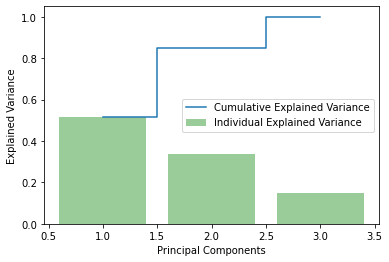

In [33]:
scaler = StandardScaler()
std_cust = scaler.fit_transform(df)

pca = PCA()
pca.fit(std_cust)

plt.step(range(1, df.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, df.shape[1] + 1), pca.explained_variance_ratio_, 
        alpha=0.4, color='g', label='Individual Explained Variance')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='center right');

plt.savefig('D:/Desktop/DataMining/cust_pca.png')

In [34]:
pca = PCA(n_components=2)
pca_cust = pca.fit_transform(std_cust)

In [35]:
ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')  # setting distance_threshold=0 ensures we compute the full tree
clusters_customers = ward.fit_predict(pca_cust)

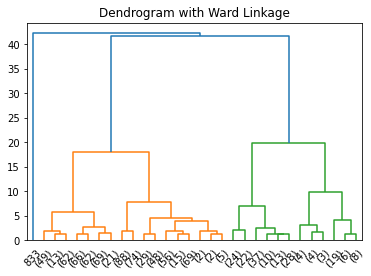

In [36]:
plt.title('Dendrogram with Ward Linkage')
plot_dendrogram(ward, truncate_mode='lastp')  # plot the last p non-singleton clusters formed in the linkage

plt.savefig('D:/Desktop/DataMining/ward-link_2009.png')

In [37]:
#two clusters
ward = AgglomerativeClustering(distance_threshold=None, n_clusters=4, linkage='ward')
clusters_customers = ward.fit_predict(pca_cust)

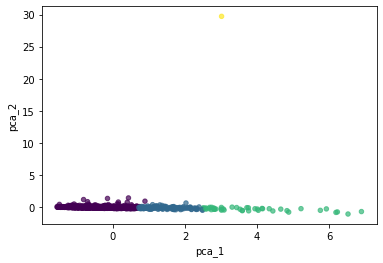

In [38]:
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_cust.T, c=clusters_customers, s=20, alpha=0.7);

In [39]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)


,0,1,2,3
CustomersNb,730,134,44,1


<BarContainer object of 4 artists>

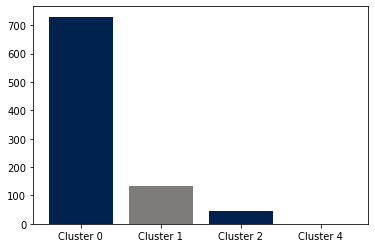

In [40]:
df["LABEL"] = clusters_customers
clust_list = list()
for i in range(len(df['LABEL'].unique())):
    clust_list.append(df[df['LABEL'] == i])
plt.bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 4'], [len(clust_list[0]), len(clust_list[1]),len(clust_list[2]), len(clust_list[3])], color=['#00224e','#7d7c78','#01224e', '#00224e'])

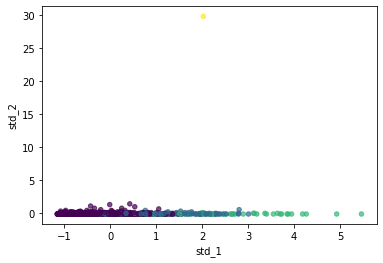

In [41]:
#NO PCA
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_cust[:, 0], std_cust[:, 1], c=clusters_customers, s=20, alpha=0.7);


In [42]:
customer_ward = df.copy(deep=True)
customer_ward['cluster'] = clusters_customers
customer_ward['cluster'] = customer_ward['cluster']
customer_ward

,avgSpent,Nsessions,avgItemSession,LABEL,cluster
Customer ID,,,,,
12346.0,3.800,5,5.2,0,0
12358.0,35.890,1,91.0,0,0
12359.0,48.570,2,97.0,0,0
12417.0,23.575,2,74.5,0,0
12422.0,6.650,1,60.0,0,0
...,...,...,...,...,...
18268.0,37.170,1,142.0,0,0
18271.0,26.550,1,44.0,0,0
18275.0,20.650,1,128.0,0,0


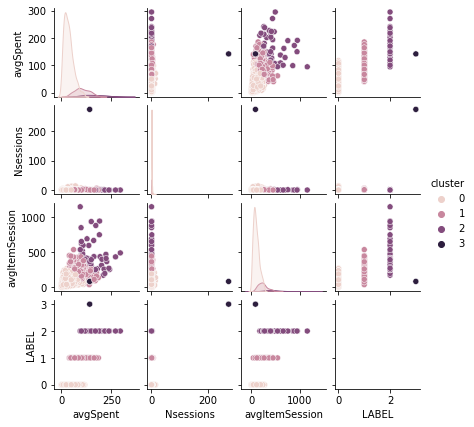

In [43]:
sns.pairplot(customer_ward, hue='cluster', diag_kind='kde', height=1.5);

<h1>Customer 2010</h1>

In [44]:
# Starting dataset
df = pd.read_csv('D:/Desktop/DataMining/Customer_2010_subset_2.csv', sep=',', index_col=0)
df

,avgSpent,Nsessions,Max,Min,DistinctItem,avgItemSession,MaxSessionsMonth,MeanTimeGap
Customer ID,,,,,,,,
12346.0,31.226667,6,142.31,4.50,25,7.333333,6,33.0
12347.0,74.150000,2,87.69,60.61,67,379.500000,10,111.0
12348.0,8.295000,2,14.39,2.20,20,234.500000,12,80.0
12349.0,138.495000,2,163.76,113.23,77,457.000000,10,182.0
12351.0,36.710000,1,36.71,36.71,20,260.000000,11,0.0
...,...,...,...,...,...,...,...,...
18285.0,24.200000,1,24.20,24.20,8,58.000000,2,0.0
18286.0,111.890000,1,111.89,111.89,45,417.000000,8,0.0
18287.0,37.425000,4,100.45,5.10,62,182.750000,11,63.0


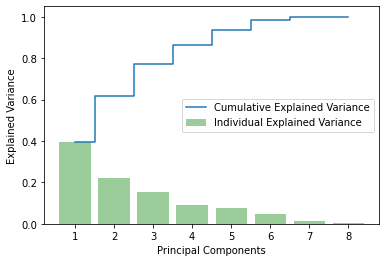

In [45]:
scaler = StandardScaler()
std_cust = scaler.fit_transform(df)

pca = PCA()
pca.fit(std_cust)

plt.step(range(1, df.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, df.shape[1] + 1), pca.explained_variance_ratio_, 
        alpha=0.4, color='g', label='Individual Explained Variance')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='center right');

plt.savefig('D:/Desktop/DataMining/cust_pca.png')

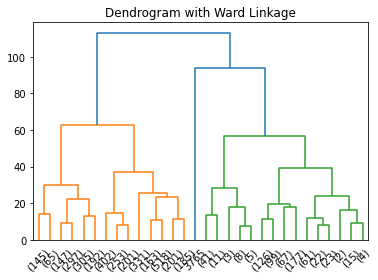

In [46]:
pca = PCA(n_components=2)
pca_cust = pca.fit_transform(std_cust)

ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')  # setting distance_threshold=0 ensures we compute the full tree
clusters_customers = ward.fit_predict(pca_cust)

plt.title('Dendrogram with Ward Linkage')
plot_dendrogram(ward, truncate_mode='lastp')  # plot the last p non-singleton clusters formed in the linkage

plt.savefig('D:/Desktop/DataMining/ward-link_2010.png')

In [47]:
#four clusters
ward = AgglomerativeClustering(distance_threshold=None, n_clusters=4, linkage='ward')
clusters_customers = ward.fit_predict(pca_cust)

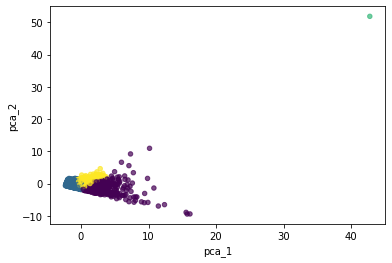

In [48]:
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_cust.T, c=clusters_customers, s=20, alpha=0.7);

In [49]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)


,0,1,2,3
CustomersNb,664,2254,1,1151


<BarContainer object of 4 artists>

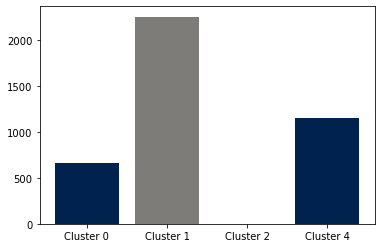

In [50]:
df["LABEL"] = clusters_customers
clust_list = list()
for i in range(len(df['LABEL'].unique())):
    clust_list.append(df[df['LABEL'] == i])
plt.bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 4'], [len(clust_list[0]), len(clust_list[1]),len(clust_list[2]), len(clust_list[3])], color=['#00224e','#7d7c78','#01224e', '#00224e'])

In [51]:
customer_ward = df.copy(deep=True)
customer_ward['cluster'] = clusters_customers
customer_ward['cluster'] = customer_ward['cluster']
customer_ward

,avgSpent,Nsessions,Max,Min,DistinctItem,avgItemSession,MaxSessionsMonth,MeanTimeGap,LABEL,cluster
Customer ID,,,,,,,,,,
12346.0,31.226667,6,142.31,4.50,25,7.333333,6,33.0,1,1
12347.0,74.150000,2,87.69,60.61,67,379.500000,10,111.0,0,0
12348.0,8.295000,2,14.39,2.20,20,234.500000,12,80.0,1,1
12349.0,138.495000,2,163.76,113.23,77,457.000000,10,182.0,0,0
12351.0,36.710000,1,36.71,36.71,20,260.000000,11,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...
18285.0,24.200000,1,24.20,24.20,8,58.000000,2,0.0,1,1
18286.0,111.890000,1,111.89,111.89,45,417.000000,8,0.0,0,0
18287.0,37.425000,4,100.45,5.10,62,182.750000,11,63.0,3,3


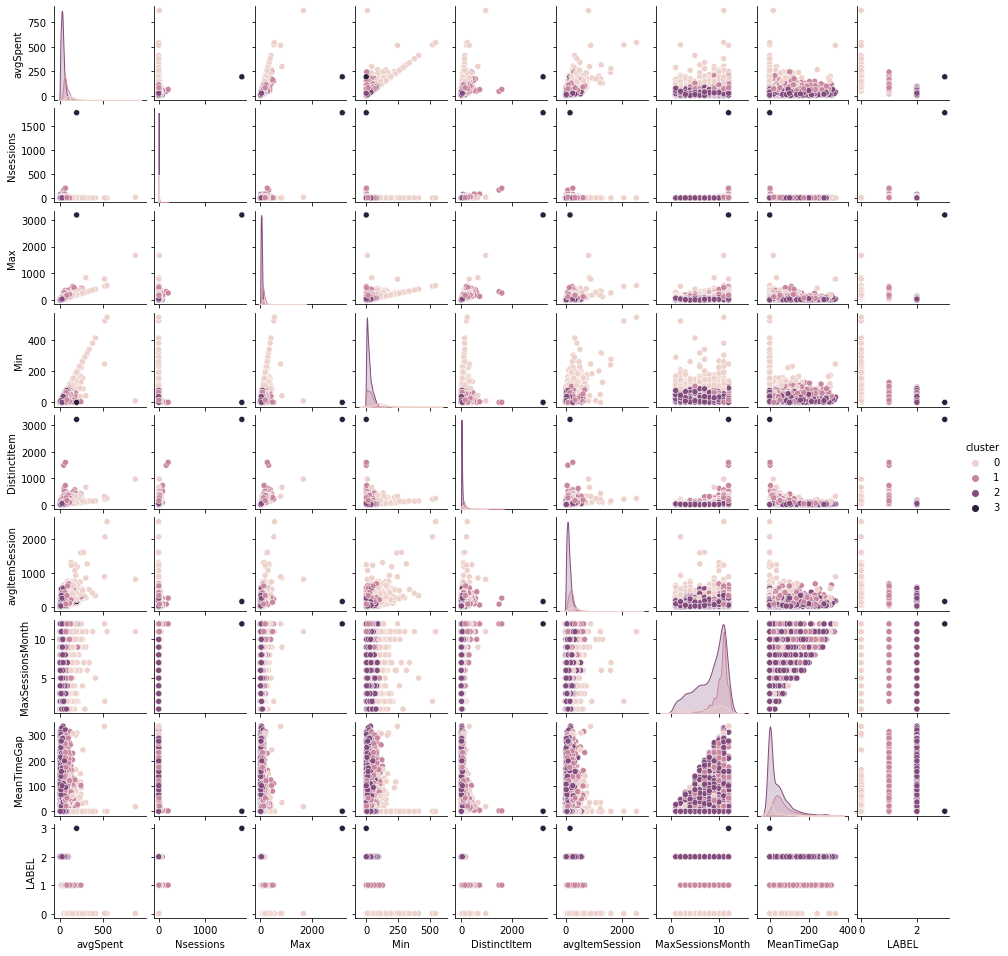

In [62]:
sns.pairplot(customer_ward, hue='cluster', diag_kind='kde', height=1.5);

<h1>Customer 2011</h1>

In [63]:
# Starting dataset
df = pd.read_csv('D:/Desktop/DataMining/Customer_2011_subset_2.csv', sep=',', index_col=0)
df

,avgSpent,Nsessions,Max,Min,DistinctItem,avgItemSession,MaxSessionsMonth,MeanTimeGap
Customer ID,,,,,,,,
12347.0,51.731667,6,92.67,13.54,82,275.333333,10,55.600000
12348.0,0.850000,2,0.85,0.85,2,22.000000,5,99.000000
12349.0,200.750000,1,200.75,200.75,64,547.000000,11,0.000000
12350.0,25.300000,1,25.30,25.30,16,196.000000,2,0.000000
12352.0,30.644286,7,53.20,12.55,50,71.714286,9,44.666667
...,...,...,...,...,...,...,...,...
18281.0,5.460000,1,5.46,5.46,5,52.000000,12,0.000000
18282.0,11.925000,2,13.08,10.77,8,25.500000,5,85.000000
18283.0,70.714375,16,124.18,1.25,259,84.562500,11,20.733333


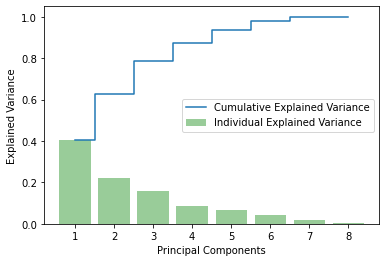

In [54]:
scaler = StandardScaler()
std_cust = scaler.fit_transform(df)

pca = PCA()
pca.fit(std_cust)

plt.step(range(1, df.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, df.shape[1] + 1), pca.explained_variance_ratio_, 
        alpha=0.4, color='g', label='Individual Explained Variance')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='center right');

plt.savefig('D:/Desktop/DataMining/cust_pca.png')

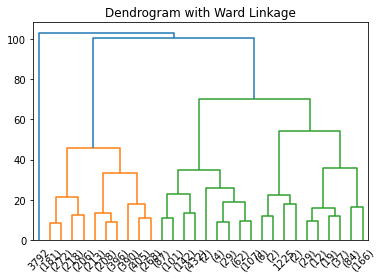

In [55]:
pca = PCA(n_components=2)
pca_cust = pca.fit_transform(std_cust)

ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')  # setting distance_threshold=0 ensures we compute the full tree
clusters_customers = ward.fit_predict(pca_cust)

plt.title('Dendrogram with Ward Linkage')
plot_dendrogram(ward, truncate_mode='lastp')  # plot the last p non-singleton clusters formed in the linkage

plt.savefig('D:/Desktop/DataMining/ward-link_2011.png')

In [56]:
#four clusters
ward = AgglomerativeClustering(distance_threshold=None, n_clusters=4, linkage='ward')
clusters_customers = ward.fit_predict(pca_cust)

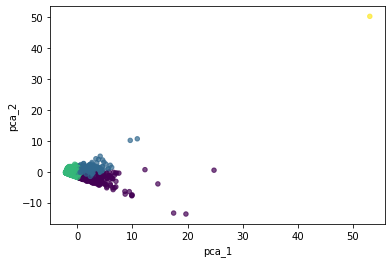

In [57]:
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_cust.T, c=clusters_customers, s=20, alpha=0.7);

In [58]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)


,0,1,2,3
CustomersNb,358,966,2757,1


<BarContainer object of 4 artists>

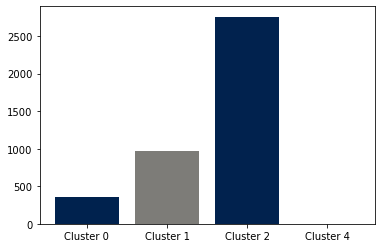

In [59]:
df["LABEL"] = clusters_customers
clust_list = list()
for i in range(len(df['LABEL'].unique())):
    clust_list.append(df[df['LABEL'] == i])
plt.bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 4'], [len(clust_list[0]), len(clust_list[1]),len(clust_list[2]), len(clust_list[3])], color=['#00224e','#7d7c78','#01224e', '#00224e'])

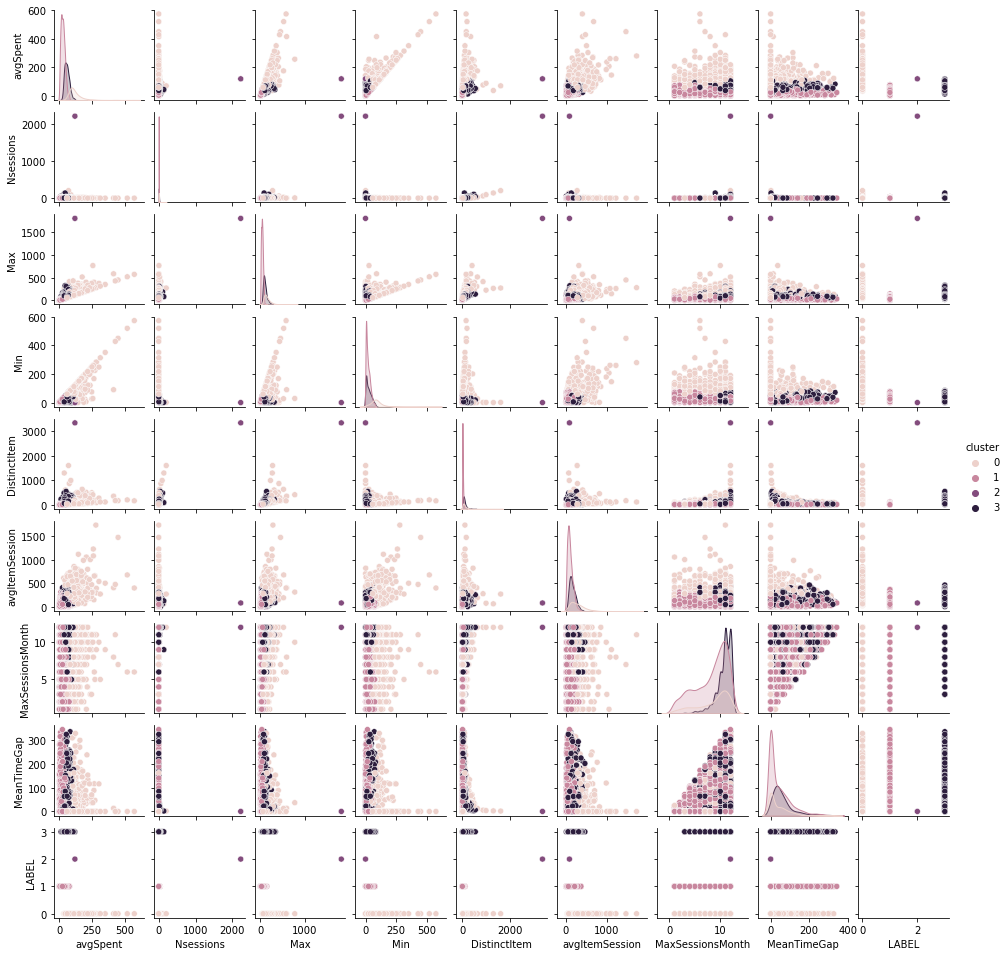

In [60]:
sns.pairplot(customer_ward, hue='cluster', diag_kind='kde', height=1.5);

In [61]:
customer_ward = df.copy(deep=True)
customer_ward['cluster'] = clusters_customers
customer_ward['cluster'] = customer_ward['cluster']
customer_ward

,avgSpent,Nsessions,Max,Min,DistinctItem,avgItemSession,MaxSessionsMonth,MeanTimeGap,LABEL,cluster
Customer ID,,,,,,,,,,
12347.0,51.731667,6,92.67,13.54,82,275.333333,10,55.600000,1,1
12348.0,0.850000,2,0.85,0.85,2,22.000000,5,99.000000,2,2
12349.0,200.750000,1,200.75,200.75,64,547.000000,11,0.000000,0,0
12350.0,25.300000,1,25.30,25.30,16,196.000000,2,0.000000,2,2
12352.0,30.644286,7,53.20,12.55,50,71.714286,9,44.666667,2,2
...,...,...,...,...,...,...,...,...,...,...
18281.0,5.460000,1,5.46,5.46,5,52.000000,12,0.000000,2,2
18282.0,11.925000,2,13.08,10.77,8,25.500000,5,85.000000,2,2
18283.0,70.714375,16,124.18,1.25,259,84.562500,11,20.733333,1,1
